In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [3]:
west = pd.read_excel('WEST.xlsx').set_index('index').fillna(method='ffill')

In [4]:
west.index = pd.to_datetime(west.index).round('h')
west['MonthNumber'] = west.index.month
west['WeekNumber'] = west.index.week
west['DayNumber'] = west.index.dayofweek
west['HourNumber'] = west.index.hour

# Solar

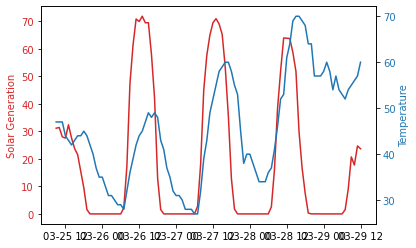

In [5]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(west.index[2000:2100], west['WEST_solar'][2000:2100], color=color)
ax1.set_ylabel('Solar Generation', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(west.index[2000:2100], west['HourlyDryBulbTemperature'][2000:2100], color=color)
ax2.set_ylabel('Temperature', color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [6]:
X = west.drop(west.columns[-7:-4], axis=1).drop('HourlyStationPressure', axis=1).drop('HourlyVisibility', axis=1)
y = west['WEST_solar']

split = 0.99

X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]

In [7]:
tree_solar = RandomForestRegressor()
tree_solar.fit(X_train,y_train)
score_tree_solar = tree_solar.score(X_test,y_test)
tree_solar_predict = tree_solar.predict(X_test)

In [8]:
r2_score(y_test, tree_solar_predict)

0.0568287817453752

In [9]:
y_pred = tree_solar.predict(X)

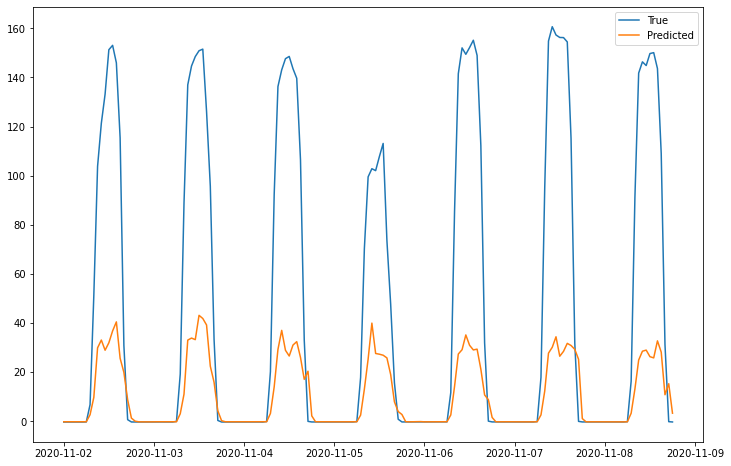

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(west.index[int(split*len(X)):], west['WEST_solar'][int(split*len(X)):], label = 'True')
plt.plot(west.index[int(split*len(X)):], y_pred[int(split*len(X)):], label = 'Predicted')
plt.legend()

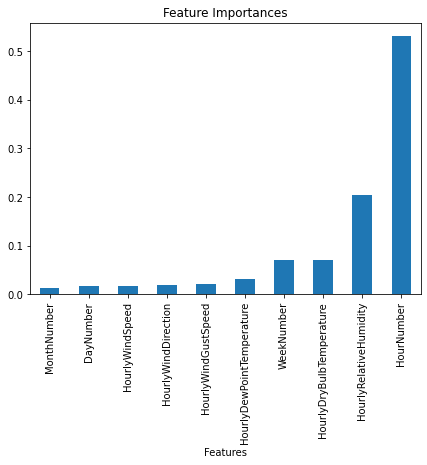

In [11]:
feature_importance_df = pd.DataFrame({'Feature Importances': tree_solar.feature_importances_, 'Features': X_train.columns.values})

feature_importance_df.sort_values('Feature Importances').plot.bar(x = 'Features', figsize = (7, 5), legend=False, title='Feature Importances');

# Wind

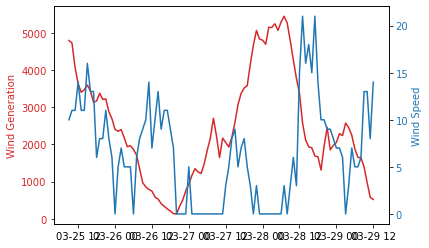

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(west.index[2000:2100], west['WEST_wind'][2000:2100], color=color)
ax1.set_ylabel('Wind Generation', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(west.index[2000:2100], west['HourlyWindSpeed'][2000:2100], color=color)
ax2.set_ylabel('Wind Speed', color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [13]:
X = west.drop(west.columns[-7:-4], axis=1).drop('HourlyStationPressure', axis=1).drop('HourlyVisibility', axis=1)
y = west['WEST_wind']

split = 0.99

X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]

In [14]:
tree_wind = RandomForestRegressor()
tree_wind.fit(X_train,y_train)
score_tree_wind = tree_wind.score(X_test,y_test)
tree_wind_predict = tree_wind.predict(X_test)

In [15]:
r2_score(y_test, tree_wind_predict)

-0.856067568741048

In [16]:
y_pred = tree_wind.predict(X)

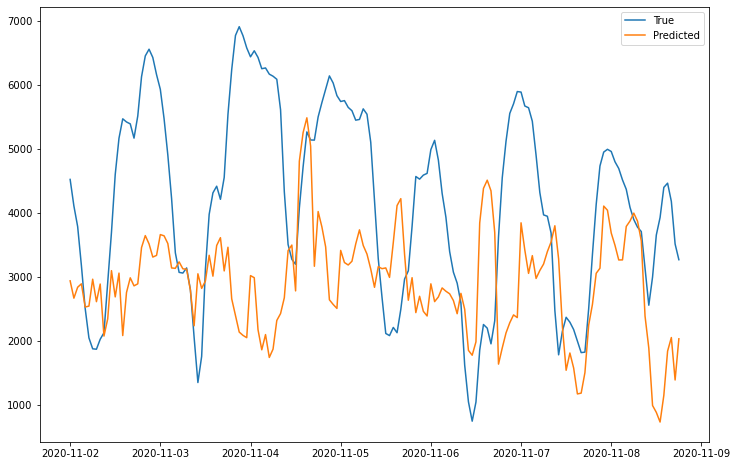

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(west.index[int(split*len(X)):], west['WEST_wind'][int(split*len(X)):], label = 'True')
plt.plot(west.index[int(split*len(X)):], y_pred[int(split*len(X)):], label = 'Predicted')
plt.legend()

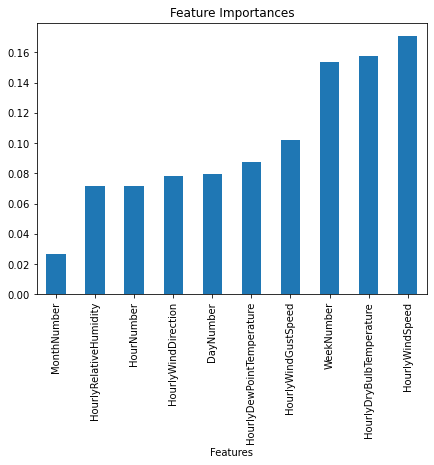

In [18]:
feature_importance_df = pd.DataFrame({'Feature Importances': tree_wind.feature_importances_, 'Features': X_train.columns.values})

feature_importance_df.sort_values('Feature Importances').plot.bar(x = 'Features', figsize = (7, 5), legend=False, title='Feature Importances');

# Demand

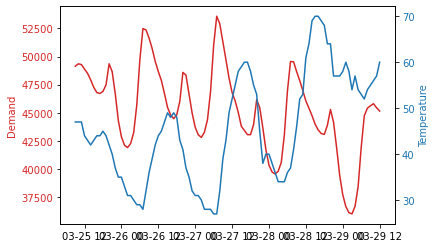

In [19]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(west.index[2000:2100], west['WEST_demand'][2000:2100], color=color)
ax1.set_ylabel('Demand', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(west.index[2000:2100], west['HourlyDryBulbTemperature'][2000:2100], color=color)
ax2.set_ylabel('Temperature', color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [20]:
X = west.drop(west.columns[-7:-4], axis=1).drop('HourlyStationPressure', axis=1).drop('HourlyVisibility', axis=1)
y = west['WEST_demand']

split = 0.99

X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]

In [21]:
tree_demand = RandomForestRegressor()
tree_demand.fit(X_train,y_train)
score_tree_demand = tree_demand.score(X_test,y_test)
tree_demand_predict = tree_demand.predict(X_test)

In [22]:
r2_score(y_test, tree_demand_predict)

0.3083706271098866

In [23]:
y_pred = tree_demand.predict(X)

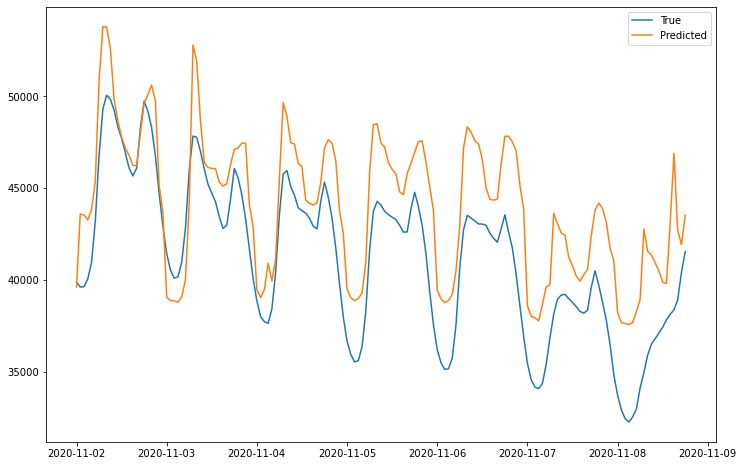

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(west.index[int(split*len(X)):], west['WEST_demand'][int(split*len(X)):], label = 'True')
plt.plot(west.index[int(split*len(X)):], y_pred[int(split*len(X)):], label = 'Predicted')
plt.legend()

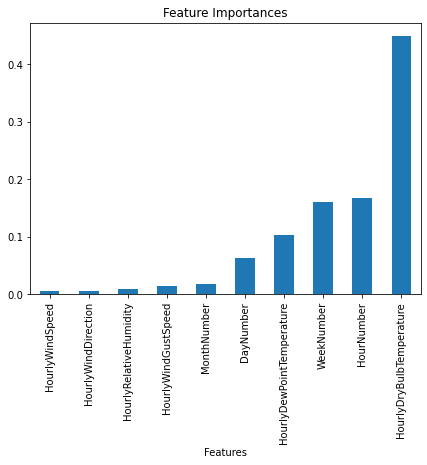

In [25]:
feature_importance_df = pd.DataFrame({'Feature Importances': tree_demand.feature_importances_, 'Features': X_train.columns.values})

feature_importance_df.sort_values('Feature Importances').plot.bar(x = 'Features', figsize = (7, 5), legend=False, title='Feature Importances');

# Forecast Data

In [26]:
west_forecast = pd.read_excel('west_Forecasting.xlsx').set_index('Hour (EST)').fillna(0)
west_forecast['MonthNumber'] = west_forecast.index.month
west_forecast['WeekNumber'] = west_forecast.index.week
west_forecast['DayNumber'] = west_forecast.index.dayofweek
west_forecast['HourNumber'] = west_forecast.index.hour
west_forecast = west_forecast.replace('N', 0)
west_forecast = west_forecast.replace('NE', 45)
west_forecast = west_forecast.replace('E', 90)
west_forecast = west_forecast.replace('SE', 135)
west_forecast = west_forecast.replace('S', 180)
west_forecast = west_forecast.replace('SW', 225)
west_forecast = west_forecast.replace('W', 270)
west_forecast = west_forecast.replace('NW', 315)

In [27]:
west_forecast['Predicted Solar Output'] = tree_solar.predict(west_forecast[X.columns])
west_forecast['Predicted Wind Output'] = tree_wind.predict(west_forecast[X.columns])
west_forecast['Predicted Demand'] = tree_demand.predict(west_forecast[X.columns])

## Solar Prediction

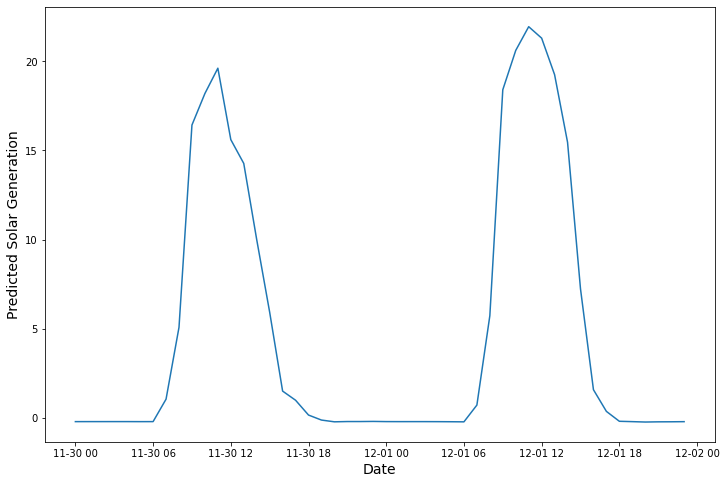

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(west_forecast.index, west_forecast['Predicted Solar Output'])
plt.xlabel('Date', fontsize = 14);
plt.ylabel('Predicted Solar Generation', fontsize = 14);

## Wind Prediction

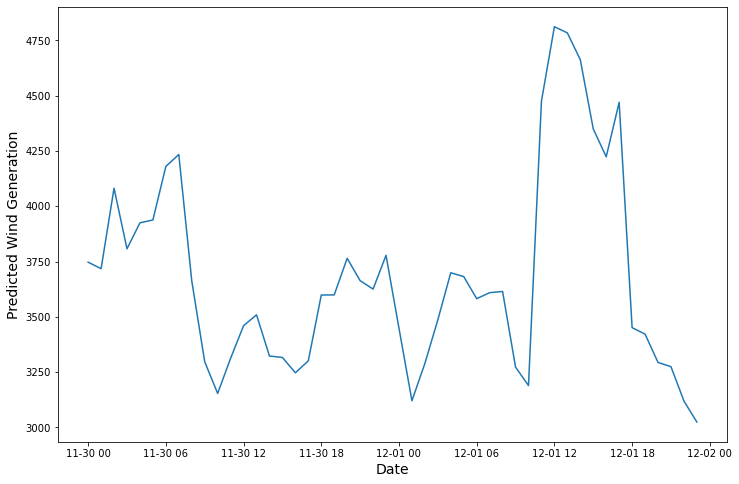

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(west_forecast.index, west_forecast['Predicted Wind Output'])
plt.xlabel('Date', fontsize = 14);
plt.ylabel('Predicted Wind Generation', fontsize = 14);

## Demand Prediction

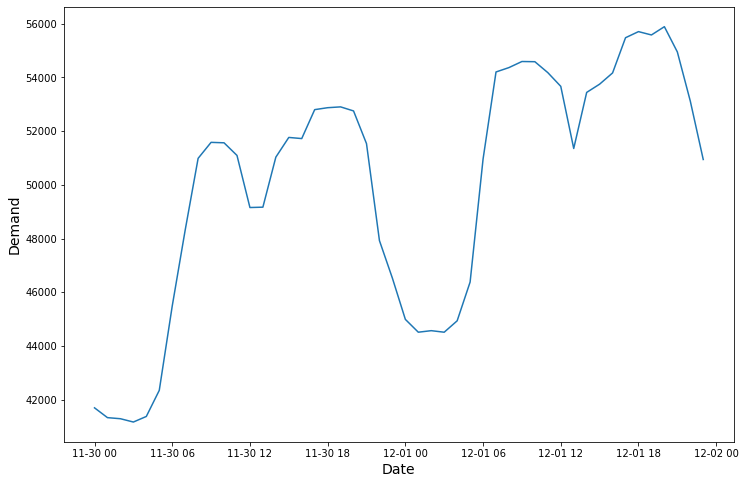

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(west_forecast.index, west_forecast['Predicted Demand'])
plt.xlabel('Date', fontsize = 14);
plt.ylabel('Demand', fontsize = 14);

## Plotting Demand, Solar, and Wind

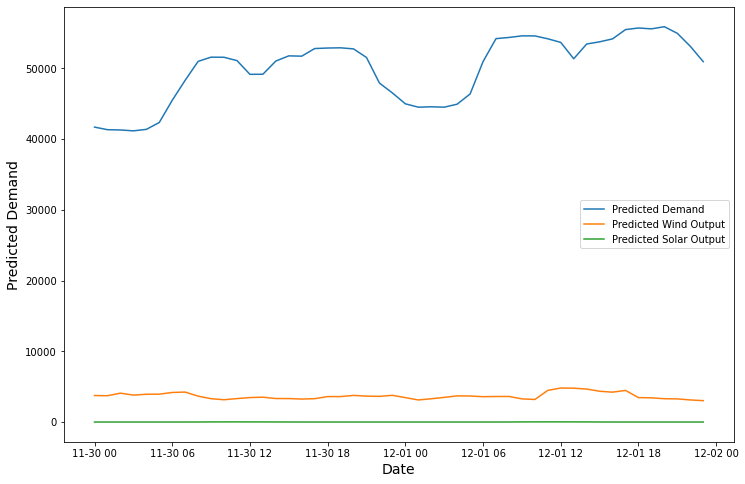

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(west_forecast.index, west_forecast['Predicted Demand'], label = 'Predicted Demand')
plt.plot(west_forecast.index, west_forecast['Predicted Wind Output'], label = 'Predicted Wind Output')
plt.plot(west_forecast.index, west_forecast['Predicted Solar Output'], label = 'Predicted Solar Output')
plt.legend()
plt.xlabel('Date', fontsize = 14);
plt.ylabel('Predicted Demand', fontsize = 14);